In [5]:
from magicgap import *

In [ ]:
def avg_magic_avg_subspace_mc(D, d, d_s, M=750):
    n = (D.ndim - 2) // 2
    d_b = d**n
    samples = [avg_magic_subspace_multiqudit(D, rand_basis(d_s, d_b), d) for _ in range(M)]
    return np.mean(samples), np.std(samples)

def avg_magic_avg_subspace_mc2(D, d_s, M=250, R=250):
    D = flatten_if_needed(D)
    d_b = D[0].shape[0]
    means = []
    stds = []
    for i in range(R):
        mean, std = avg_magic_subspace_mc(D, rand_basis(d_s, d_b), M=M)
        means.append(mean)
        stds.append(std)
    means, stds = np.array(means), np.array(stds)
    mu = np.mean(means)
    return mu, np.sqrt((1/R**2)*sum(stds**2)/M + (1/(R-1))*sum((means - mu)**2))

In [11]:
d = 6
n = 1
d_b = d**n
D = wh_operators(*[d]*n)

In [12]:
ase_b_analytic = avg_magic_analytic(d_b)
ase_b = avg_magic_mc(D, M=3000); ase_b_analytic, ase_b

(0.6190476190476191,
 (np.float64(0.6194514217165271), np.float64(0.0461562675280563)))

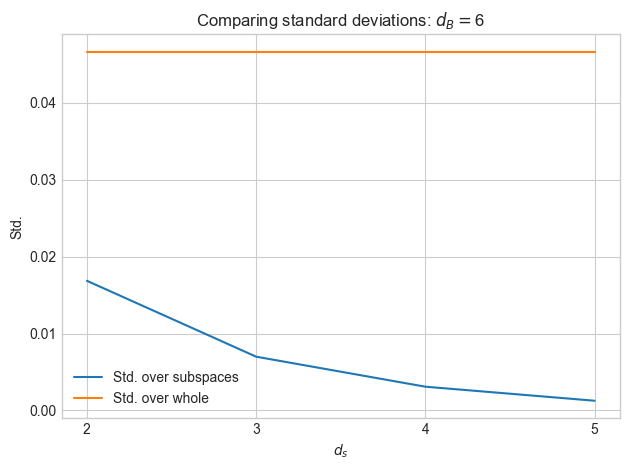

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(1)
ax.set_title("Comparing standard deviations: $d_B=$%d" % d_b)
ax.set_xlabel("$d_s$")
ax.set_ylabel("Std.")
ax.grid(True)
ax.set_xticks(d_s_range)
ax.plot(d_s_range, [_[1] for _ in ase_s], label="Std. over subspaces")
ax.plot(d_s_range, [ase_b[1]]*len(d_s_range), label="Std. over whole")
ax.legend()
plt.tight_layout()
plt.savefig("img/monte_carlo.png")
plt.show()